Analyse Exploratoire des données

In [54]:
#Importation des bibilothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [55]:
#Importation des données
data_test=pd.read_csv("data/test.csv")
data_train=pd.read_csv("data/train.csv")

In [56]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [57]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


On peut déjà remarquer que dans les deux bases de données , il n'y a pas de valeurs manquantes

In [58]:
data_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.570073e+07,658.701800,37.660800,5.038800,42888.826095,1.589467,0.779800,0.497867,117892.175400,0.199333
std,4330.271354,1.162730e+06,80.238346,8.106408,2.810354,59695.877791,0.532430,0.414395,0.500012,45574.462515,0.399512
min,0.000000,1.557151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563387e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82870.750000,0.000000
50%,7499.500000,1.569018e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123583.850000,0.000000
75%,11249.250000,1.575972e+07,709.000000,42.000000,7.000000,109844.810000,2.000000,1.000000,1.000000,157567.370000,0.000000
max,14999.000000,1.562648e+08,4818.000000,72.000000,10.000000,207034.960000,6.000000,1.000000,1.000000,199761.290000,1.000000


Division de la base de données train en train et en validation

In [59]:
donnees_train, donnees_validation = train_test_split(data_train ,test_size=0.2, random_state=100, stratify=data_train["Exited"])

Vérification de la distribution de la variable cible dans les deux bases(donnes_train,donnees_validation)

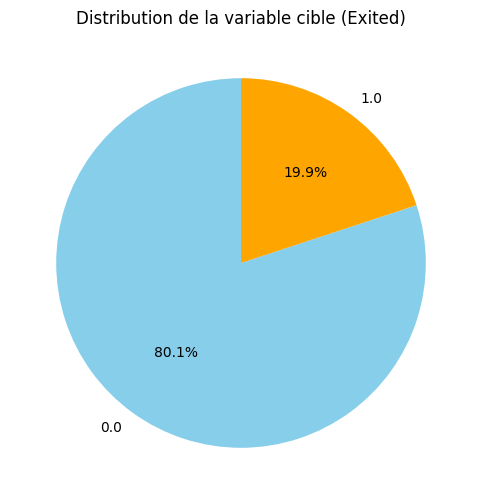

In [60]:
target_distribution = donnees_train['Exited'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    target_distribution,
    labels=target_distribution.index,
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['skyblue', 'orange'] 
)

# Ajout d'un titre
plt.title('Distribution de la variable cible (Exited)')
plt.show()

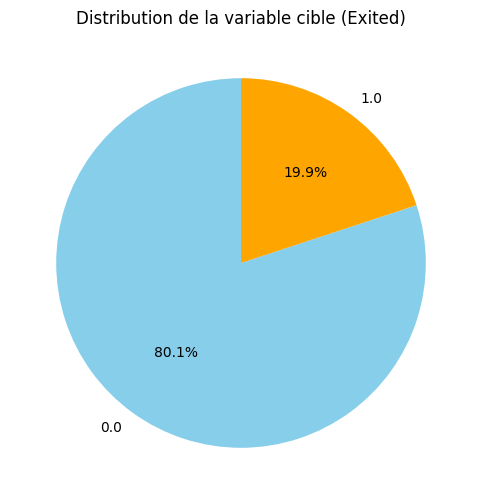

In [61]:
target_distribution = donnees_validation['Exited'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    target_distribution,
    labels=target_distribution.index,
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['skyblue', 'orange'] 
)

# Ajout d'un titre
plt.title('Distribution de la variable cible (Exited)')
plt.show()

Vérification a travers un PSI(indice de stabilité de population pour plusieurs variables)

In [62]:


def calculate_psi(expected, actual, bins=5):
   
    if not np.issubdtype(expected.dtype, np.number) or not np.issubdtype(actual.dtype, np.number):
        raise ValueError("Les colonnes doivent être numériques pour calculer le PSI.")
    

    breakpoints = np.linspace(expected.min(), expected.max(), bins + 1)
    
  
    expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)
    
    
    actual_percents = np.where(actual_percents == 0, 1e-8, actual_percents)
    expected_percents = np.where(expected_percents == 0, 1e-8, expected_percents)
    
  
    psi = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))
    return psi


variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for var in variables:
    psi_value = calculate_psi(donnees_train[var], data_test[var])  # Remplacez par `donnees_test[var]` pour la comparaison
    print(f"PSI for {var}: {psi_value:.4f}")
    if psi_value < 0.1:
        print(f"Les distributions de {var} sont très similaires. L’échantillon est représentatif.\n")
    else:
        print(f"Les distributions de {var} sont différentes. Vérifiez la représentativité de l’échantillon.\n")


PSI for CreditScore: 0.0008
Les distributions de CreditScore sont très similaires. L’échantillon est représentatif.

PSI for Age: 0.0011
Les distributions de Age sont très similaires. L’échantillon est représentatif.

PSI for Tenure: 0.0004
Les distributions de Tenure sont très similaires. L’échantillon est représentatif.

PSI for Balance: 0.0004
Les distributions de Balance sont très similaires. L’échantillon est représentatif.

PSI for NumOfProducts: 0.0012
Les distributions de NumOfProducts sont très similaires. L’échantillon est représentatif.

PSI for EstimatedSalary: 0.0006
Les distributions de EstimatedSalary sont très similaires. L’échantillon est représentatif.



In [63]:


def calculate_psi(expected, actual, bins=5):
 
    if not np.issubdtype(expected.dtype, np.number) or not np.issubdtype(actual.dtype, np.number):
        raise ValueError("Les colonnes doivent être numériques pour calculer le PSI.")
    
  
    breakpoints = np.linspace(expected.min(), expected.max(), bins + 1)

    expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)
   
    actual_percents = np.where(actual_percents == 0, 1e-8, actual_percents)
    expected_percents = np.where(expected_percents == 0, 1e-8, expected_percents)
    
 
    psi = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))
    return psi


variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for var in variables:
    psi_value = calculate_psi(donnees_validation[var], donnees_validation[var])  # Remplacez par `donnees_test[var]` pour la comparaison
    print(f"PSI for {var}: {psi_value:.4f}")
    if psi_value < 0.1:
        print(f"Les distributions de {var} sont très similaires. L’échantillon est représentatif.\n")
    else:
        print(f"Les distributions de {var} sont différentes. Vérifiez la représentativité de l’échantillon.\n")

PSI for CreditScore: 0.0000
Les distributions de CreditScore sont très similaires. L’échantillon est représentatif.

PSI for Age: 0.0000
Les distributions de Age sont très similaires. L’échantillon est représentatif.

PSI for Tenure: 0.0000
Les distributions de Tenure sont très similaires. L’échantillon est représentatif.

PSI for Balance: 0.0000
Les distributions de Balance sont très similaires. L’échantillon est représentatif.

PSI for NumOfProducts: 0.0000
Les distributions de NumOfProducts sont très similaires. L’échantillon est représentatif.

PSI for EstimatedSalary: 0.0000
Les distributions de EstimatedSalary sont très similaires. L’échantillon est représentatif.



Analyse Univariée

Distribution des variables quantitatives

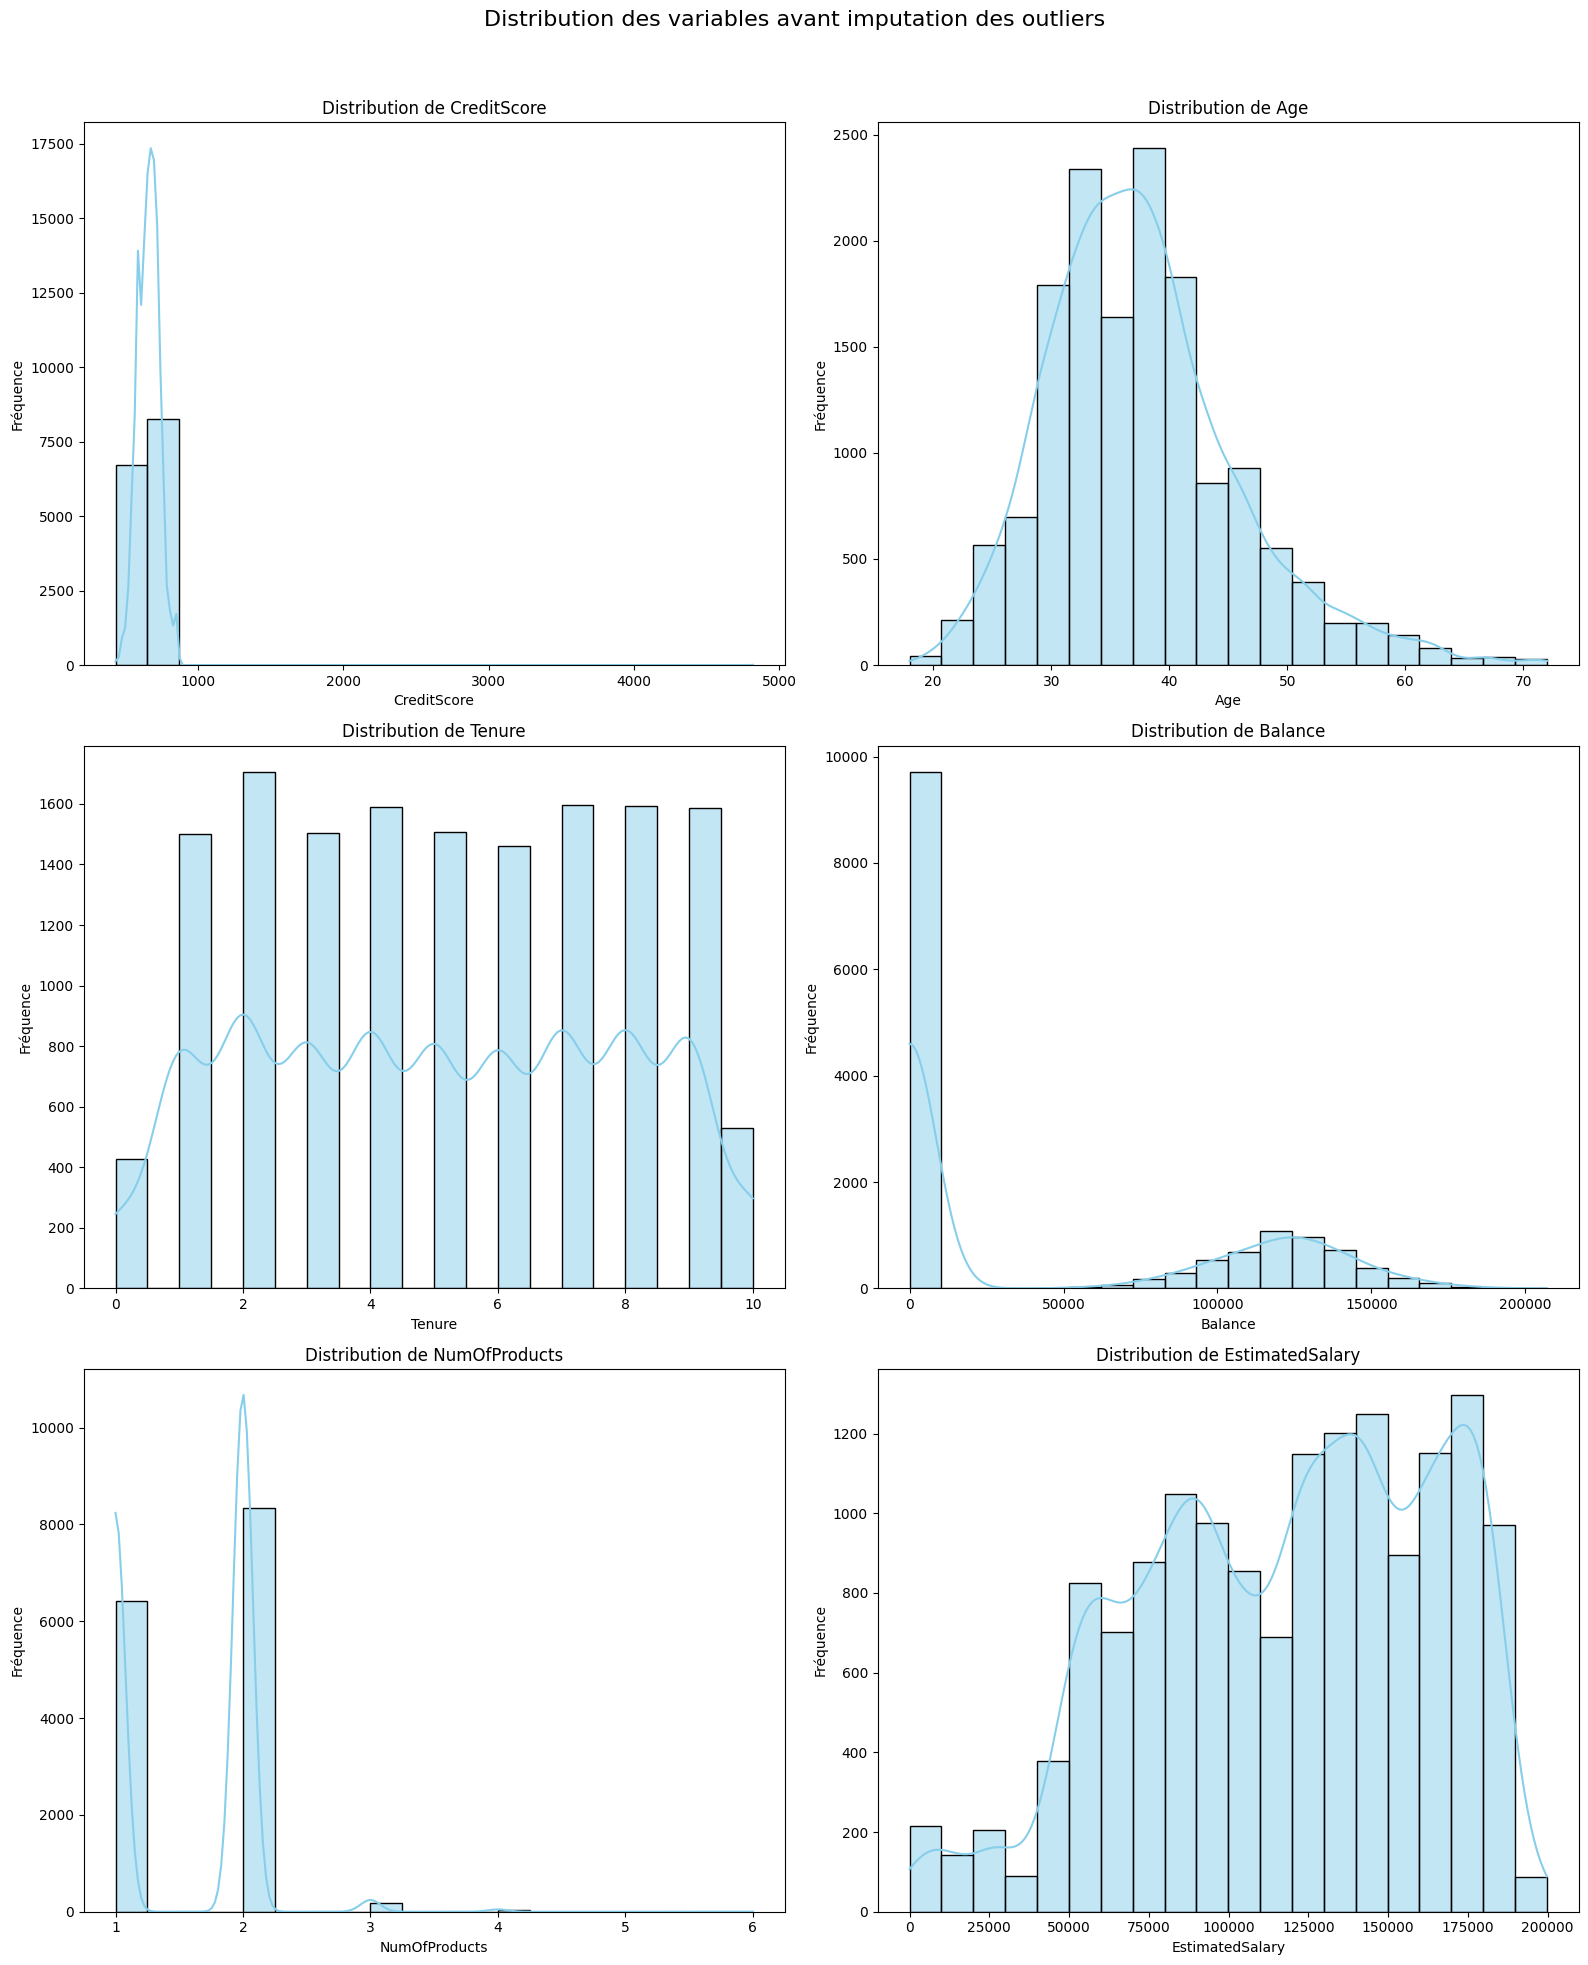

In [64]:
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
fig.suptitle('Distribution des variables avant imputation des outliers', fontsize=16)


for i, col in enumerate(num_col):
    row = i // 2
    col_position = i % 2
    ax = axes[row, col_position]
    sns.histplot(data_train[col], bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')


if len(num_col) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

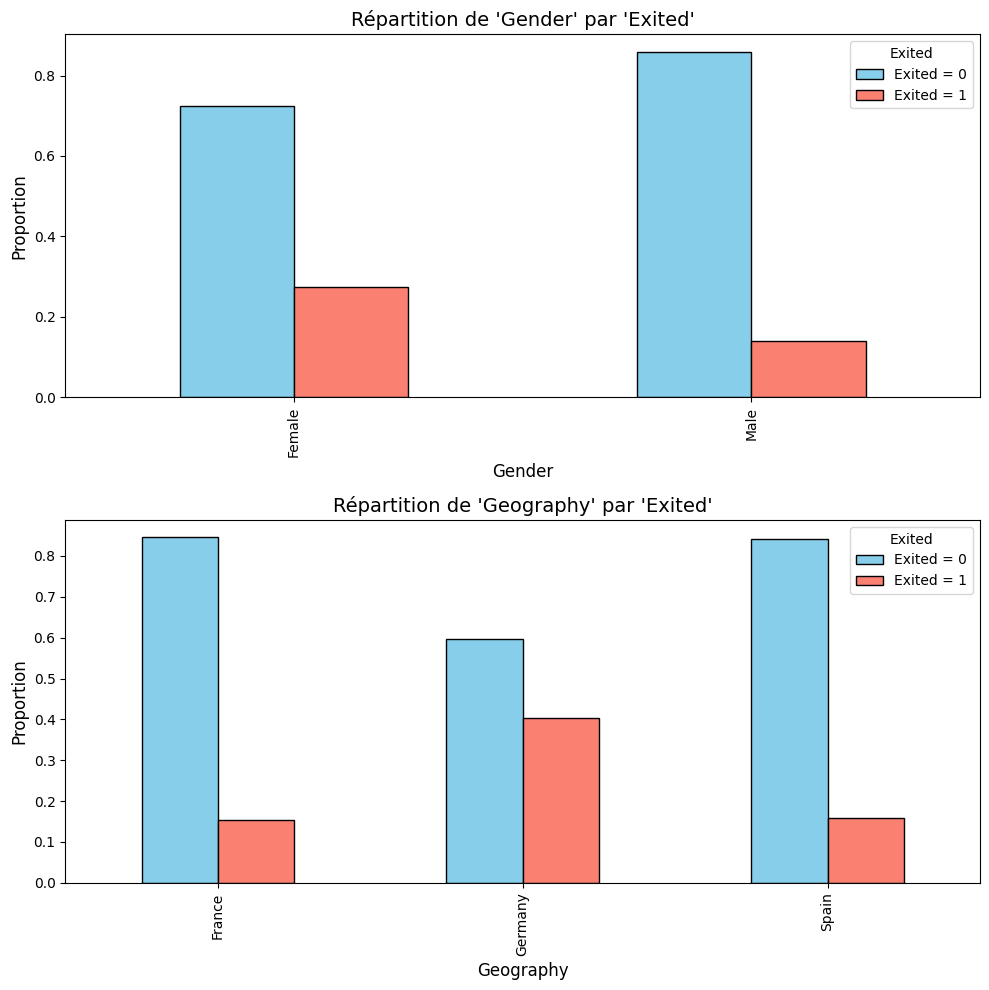

In [65]:
cat_vars = ['Gender', 'Geography']  


n_vars = len(cat_vars)
fig, axes = plt.subplots(nrows=n_vars, figsize=(10, 5 * n_vars))

for i, cat_var in enumerate(cat_vars):
   
    cross_tab = pd.crosstab(donnees_train[cat_var], donnees_train['Exited'])
   
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    
    
    cross_tab_percent.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'], edgecolor='black')
    axes[i].set_title(f"Répartition de '{cat_var}' par 'Exited'", fontsize=14)
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel("Proportion", fontsize=12)
    axes[i].legend(["Exited = 0", "Exited = 1"], title="Exited", fontsize=10)

plt.tight_layout()
plt.show()


Détection des doublons

In [66]:
# Vérifier s'il y a des doublons
doublons = donnees_train.duplicated()
nb_doublons = doublons.sum()
print(f"Nombre de doublons : {nb_doublons}")

Nombre de doublons : 0


Détection des outliers avec la méthode IQR

In [67]:
numeric_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
       'IsActiveMember']
for col in numeric_cols:

    Q1 = donnees_train[col].quantile(0.25)
    Q3 = donnees_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    number_outliers = donnees_train[(donnees_train[col] < lower_bound) | (donnees_train[col] > upper_bound)].shape[0]

    print("Le nombre des outliers de la variable", col, "est", number_outliers)


Le nombre des outliers de la variable CreditScore est 12
Le nombre des outliers de la variable Age est 281
Le nombre des outliers de la variable Tenure est 0
Le nombre des outliers de la variable Balance est 0
Le nombre des outliers de la variable NumOfProducts est 34
Le nombre des outliers de la variable EstimatedSalary est 0
Le nombre des outliers de la variable IsActiveMember est 0


Détection par les outliers 

C:\Users\lamou\AppData\Local\Temp\ipykernel_15996\1527423611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


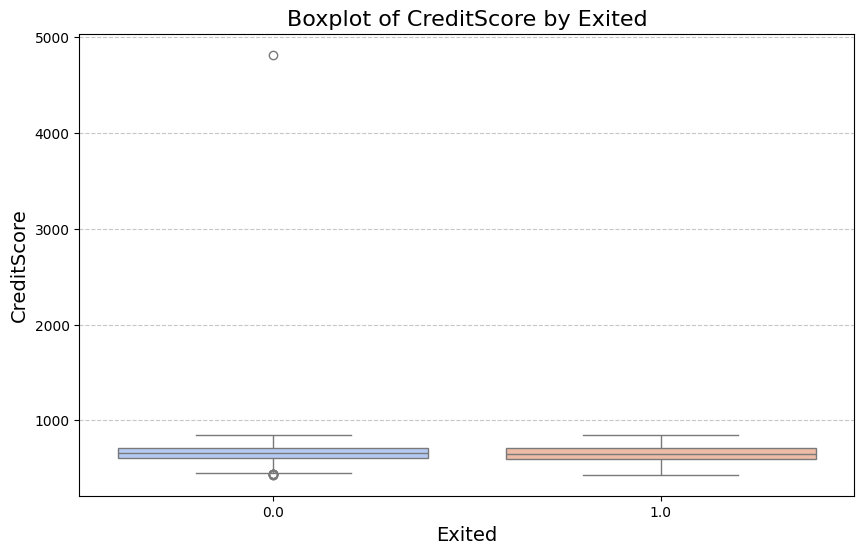

C:\Users\lamou\AppData\Local\Temp\ipykernel_15996\1527423611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


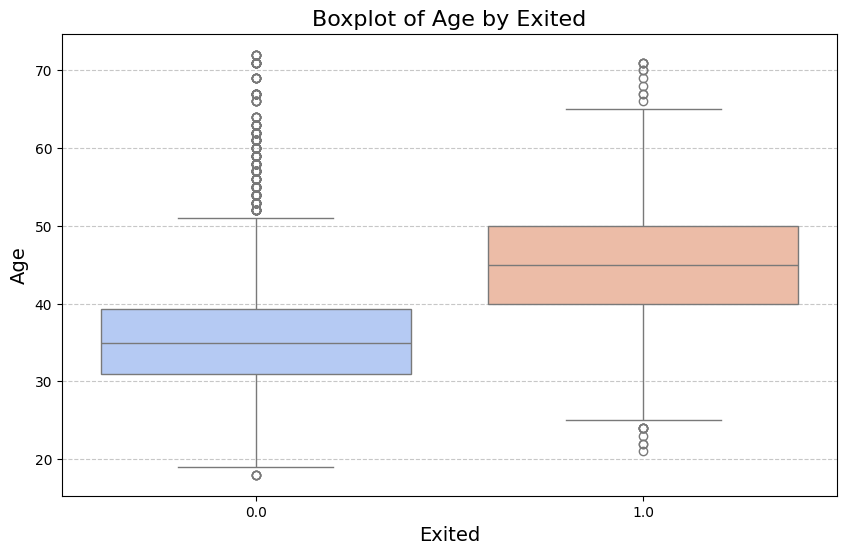

C:\Users\lamou\AppData\Local\Temp\ipykernel_15996\1527423611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


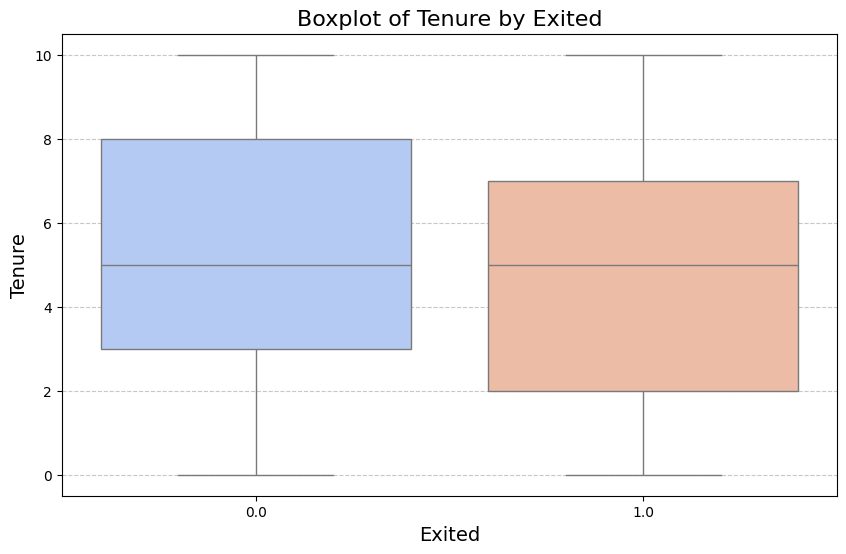

C:\Users\lamou\AppData\Local\Temp\ipykernel_15996\1527423611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


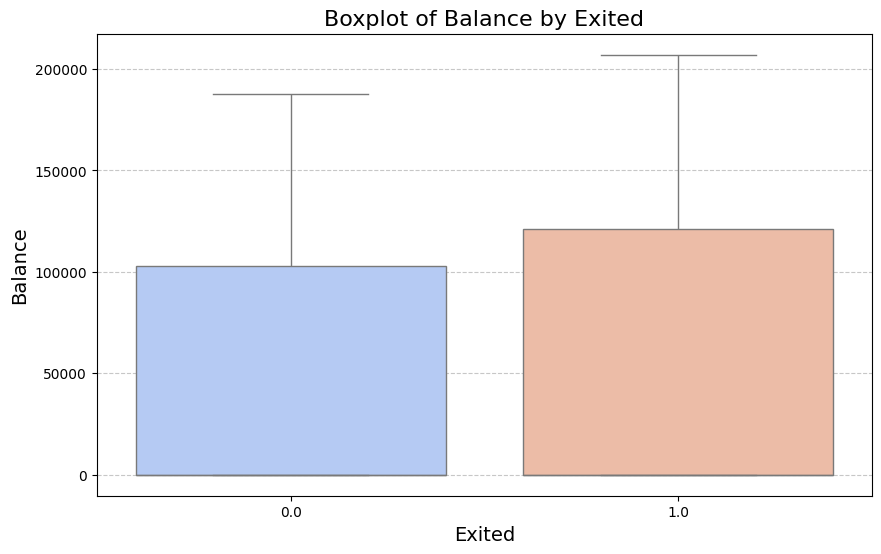

C:\Users\lamou\AppData\Local\Temp\ipykernel_15996\1527423611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


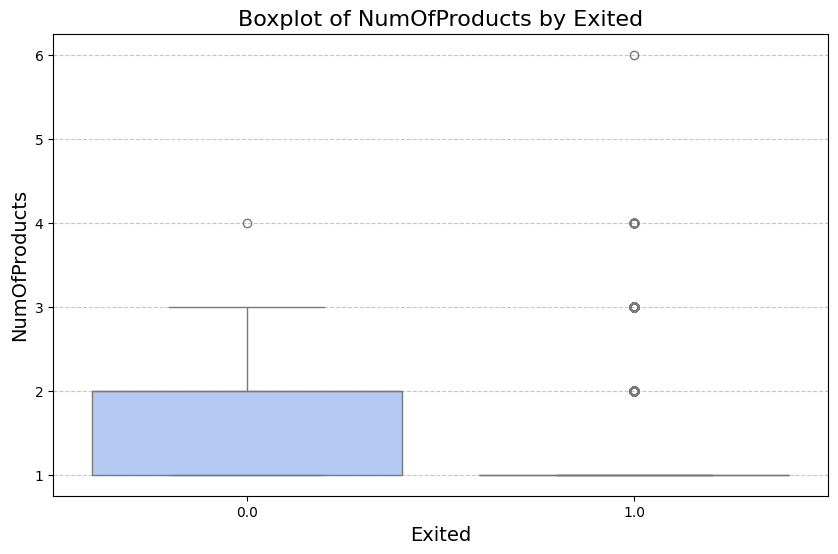

C:\Users\lamou\AppData\Local\Temp\ipykernel_15996\1527423611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


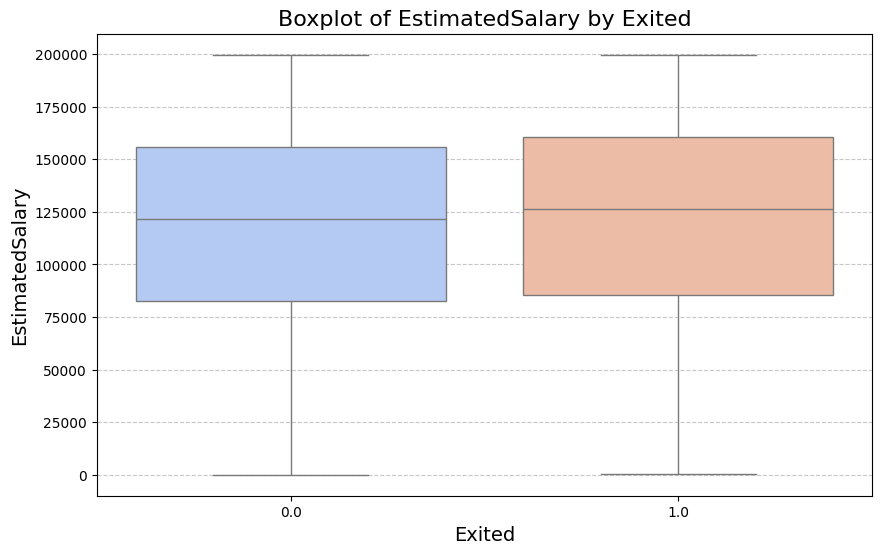

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables
var_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Loop through each variable and create a boxplot
for var in var_num:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable
    plt.title(f"Boxplot of {var} by Exited", fontsize=16)  # Add title
    plt.xlabel("Exited", fontsize=14)  # Label for x-axis
    plt.ylabel(var, fontsize=14)  # Label for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid for better readability
    plt.show()  # Display the plot


Traitement des données

Supression d'une observation car valeur extreme de CreditScore pour les scores dépassant 1000

In [69]:
donnees_train = donnees_train[donnees_train['CreditScore'] <= 1000]

donnees_validation = donnees_validation[donnees_validation['CreditScore'] <= 1000]



Encodage des variables catégorielles

In [70]:
features=['Geography', 'Gender']
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore").set_output(transform="pandas")

ohe.fit(donnees_train[features])
donnees_train[ohe.get_feature_names_out(features)] = ohe.transform(donnees_train[features])
donnees_validation[ohe.get_feature_names_out(features)] = ohe.transform(donnees_validation[features])
data_test[ohe.get_feature_names_out(features)] = ohe.transform(data_test[features])

In [71]:
donnees_validation.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
11497,11497,15642821.0,Pugh,596.0,France,Male,60.0,5.0,0.0,1.0,0.0,0.0,51703.09,1.0,0.0,0.0,1.0
6232,6232,15633608.0,Chinedum,597.0,France,Female,63.0,6.0,0.0,1.0,1.0,0.0,121846.81,1.0,0.0,0.0,0.0
4656,4656,15747647.0,Fanucci,757.0,France,Male,35.0,2.0,0.0,2.0,1.0,1.0,156768.45,0.0,0.0,0.0,1.0
10851,10851,15734987.0,Chiemenam,554.0,Germany,Male,46.0,5.0,121626.9,1.0,1.0,0.0,184954.11,1.0,1.0,0.0,1.0
4159,4159,15777907.0,Folliero,696.0,France,Female,46.0,2.0,0.0,2.0,1.0,0.0,92568.05,0.0,0.0,0.0,0.0


In [72]:
donnees_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [73]:
var_nums=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

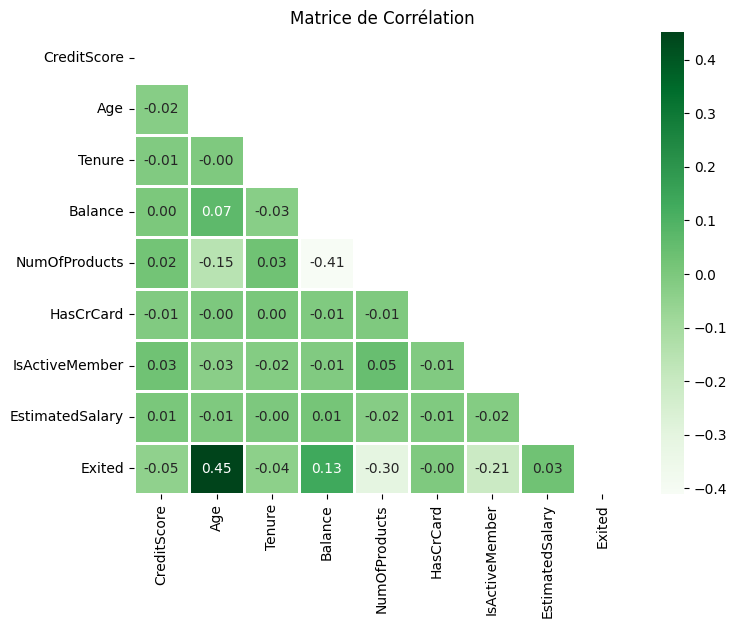

In [74]:
corr_matrix = donnees_train[var_nums].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Greens',linewidths=1,mask=np.triu(corr_matrix),fmt = '.2f', annot=True)
plt.title('Matrice de Corrélation')
plt.show()

In [75]:
donnees_validation.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
11497,11497,15642821.0,Pugh,596.0,France,Male,60.0,5.0,0.0,1.0,0.0,0.0,51703.09,1.0,0.0,0.0,1.0
6232,6232,15633608.0,Chinedum,597.0,France,Female,63.0,6.0,0.0,1.0,1.0,0.0,121846.81,1.0,0.0,0.0,0.0
4656,4656,15747647.0,Fanucci,757.0,France,Male,35.0,2.0,0.0,2.0,1.0,1.0,156768.45,0.0,0.0,0.0,1.0
10851,10851,15734987.0,Chiemenam,554.0,Germany,Male,46.0,5.0,121626.9,1.0,1.0,0.0,184954.11,1.0,1.0,0.0,1.0
4159,4159,15777907.0,Folliero,696.0,France,Female,46.0,2.0,0.0,2.0,1.0,0.0,92568.05,0.0,0.0,0.0,0.0


In [76]:
donnees_train=donnees_train.drop(columns=['Surname','CustomerId','Geography', 'Gender']) #'Geography', 'Gender',
donnees_validation=donnees_validation.drop(columns=['Surname','CustomerId','Geography', 'Gender']) #'Geography', 'Gender',
data_test=data_test.drop(columns=['Surname','CustomerId','Geography', 'Gender']) #'Geography', 'Gender',

In [83]:
data_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15713774.0,Hsieh,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1.0
1,1,15682533.0,Hs?eh,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0.0
2,2,15791550.0,Tsou,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0.0
3,3,15762762.0,Chiawuotu,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0.0
4,4,15756475.0,Nnamdi,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0.0


In [78]:
quantitative_columns=['CreditScore', 'Age','NumOfProducts']

In [79]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialiser le MinMaxScaler
# scaler = MinMaxScaler()

# data_train_scaled = donnees_train.copy()
# data_train_scaled[quantitative_columns] = scaler.fit_transform(donnees_train[quantitative_columns])

# data_val_scaled = donnees_validation.copy()
# data_val_scaled[quantitative_columns] = scaler.transform(donnees_validation[quantitative_columns])

# data_test_scaled = data_test.copy()
# data_test_scaled[quantitative_columns] = scaler.transform(data_test[quantitative_columns])




In [80]:



for col in quantitative_columns:
    
    Q1 = donnees_train[col].quantile(0.25)
    Q3 = donnees_train[col].quantile(0.75)
    IQR = Q3 - Q1

    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    donnees_train[col] = np.clip(donnees_train[col], lower_bound, upper_bound)
    donnees_validation[col]=np.clip(donnees_validation[col],lower_bound, upper_bound)
    data_test[col]=np.clip(data_test[col],lower_bound, upper_bound)


    

In [81]:
# Chemin de destination
output_path_train = "data/train_clean.csv"
output_path_validation = "data/val_clean.csv"
output_path_test = "data/test_clean.csv"

# Exporter le DataFrame en CSV
donnees_train.to_csv(output_path_train, index=False)
donnees_validation.to_csv(output_path_validation, index=False)
data_test.to_csv(output_path_test, index=False)

In [82]:
# Chemin de destination
output_path_train = "data/train_scaled.csv"
output_path_validation = "data/val_scaled.csv"
output_path_test = "data/test_scaled.csv"

# Exporter le DataFrame en CSV
data_train_scaled.to_csv(output_path_train, index=False)
data_val_scaled.to_csv(output_path_validation, index=False)
data_test_scaled.to_csv(output_path_test, index=False)

NameError: name 'data_train_scaled' is not defined

# FIN